In [3]:
import numpy as np
from scipy.integrate import odeint
import pylab as pl
%matplotlib inline

In [12]:
lcap = 6e-9
R0   = 2.84984057e-09
cinf = 55.33
cs   = 5.53e-2
Vm   = 3.29e-5
D    = 3.01e-18
k    = 7.97e-10
N0   = 8.04e21
beta = 4 * np.pi * N0 * R0**3 / (3 * Vm)
Da1  = D/(k*R0)

In [13]:
delta_C = cinf - cs * np.exp(lcap/R0)
t0      = R0**2 / (Vm * D * delta_C)

In [14]:
# Data from the peng paper
data = np.loadtxt('peng.txt', delimiter=',')

In [15]:
def dR_dt(R, t, Da):
    dRdt = (cinf - beta * R**3 - cs * np.exp(lcap / (R0 * R)))/(delta_C * (Da + R))
    return dRdt

In [16]:
t = np.linspace(0, 10, 1000)

In [17]:
Rinit = 1
sol1  = odeint(dR_dt, Rinit, t, args = (Da1,), rtol = 1e-12)

Text(0, 0.5, '$R$(in nm)')

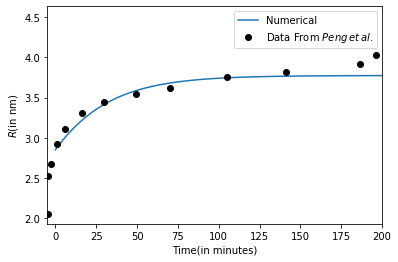

In [18]:
pl.plot(t * t0 / 60, sol1 * R0 / 1e-9, label = 'Numerical')
pl.plot(data.T[0], data.T[1], 'ko', label = r'Data From $\it{Peng\,et\,al.}$')
pl.xlim(-5, 200)
pl.legend()
pl.xlabel('Time(in minutes)')
pl.ylabel(r'$R$(in nm)')